In [78]:
import mvranalysis as mvr
import os
import numpy as np
import pandas as pd
import scipy.io as sio
from glob import glob
import json

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from colorsys import hsv_to_rgb, rgb_to_hsv
%matplotlib inline


In [38]:
ID = 150
path = '/Volumes/freeman/Nick/mVR/sessions'

logpath = '/Users/MJAY-MAC/Desktop/GITHUB/mVR-meta/mvr_behavior_log.xlsx'
log = pd.read_excel(logpath)

#150 run on antibiasL, L is correct, R is incorrect

# Load sessions

In [39]:
sessions = log[(log.AnimalNum == ID)]
unbiased = sessions[(sessions.SessionType == 'unbiased')]
antibiasL = sessions[(sessions.SessionType == 'antibiasL')]
sessions = (pd.concat([unbiased,antibiasL])).sort()
session_vals= [int(x) for x in sessions.SessionNum]
print sessions


    AnimalNum  SessionNum SessionType
32        150          57    unbiased
33        150          59    unbiased
34        150          66   antibiasL
35        150          70   antibiasL
36        150          74   antibiasL
37        150          78    unbiased
38        150          82    unbiased


In [40]:
summary = [pd.read_csv(path + '/0000' + str(x) + '/summary/trial_summary' + str(x)+ '.csv') for x in session_vals]
#Load all sessions for an animal

In [41]:
mean_trials = np.mean([(len(x))for x in summary])

In [42]:
unbiased_idx = [0,1,5,6]
antibias_idx = [2,3,4]
len(summary[0])

100

In [43]:
summary = [mvr.correctR(x) for x in summary]

# Create dot plot

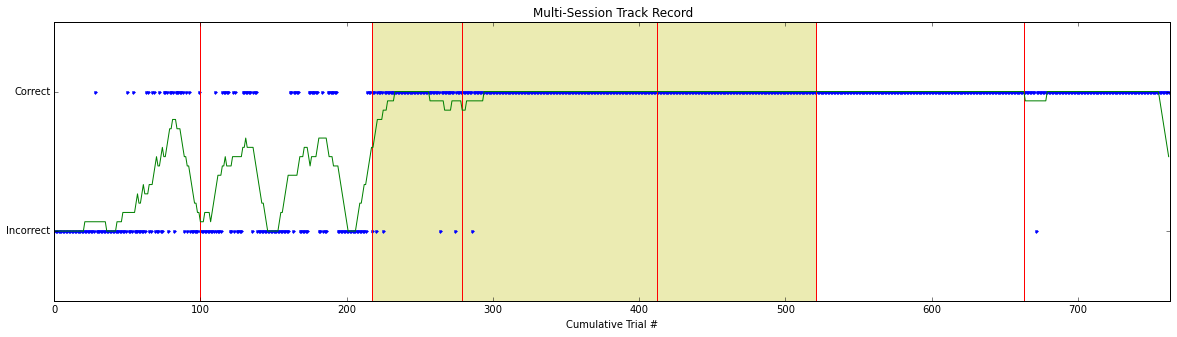

In [44]:
#Plot Correct Track Record across all sessions
plt.figure(figsize = [20,5])

dot_array = []
len_array = []
for a in range(len(summary)):
    dot_array += list(summary[a].Correct)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(dot_array,'.')
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.yticks([0,1],['Incorrect','Correct'])
plt.title('Multi-Session Track Record')


avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(dot_array,kernel, 'same')
plt.plot(avgs) 

763 763


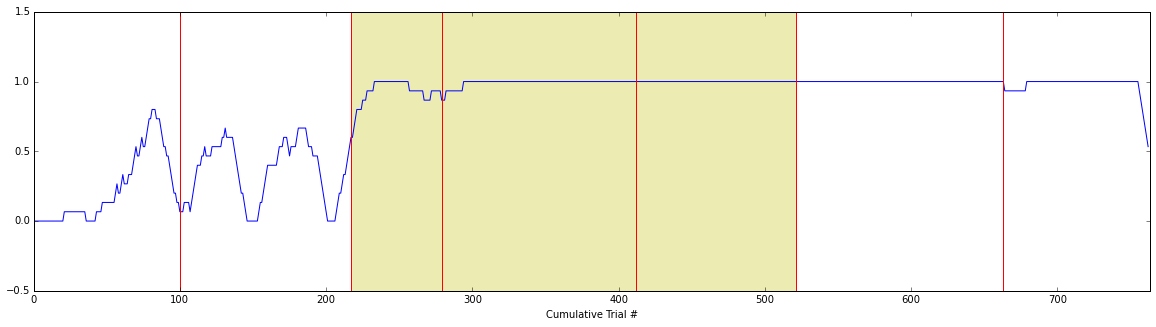

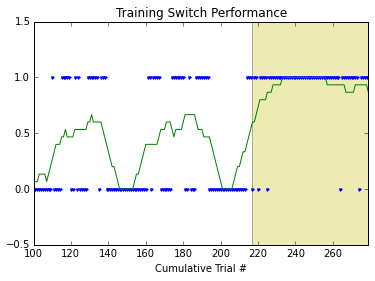

In [45]:
#Moving Average
plt.figure(figsize = [20,5])
avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(dot_array,kernel, 'same')
#for i in range(len(dot_array)):
#    avgs.append(np.mean(dot_array[i:i+binsize]))
print len(avgs), len(dot_array)
plt.plot(avgs) 
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')

plt.figure(2)
plt.plot(dot_array,'.')
plt.plot(avgs) 
plt.ylim(-0.5,1.5)
plt.xlim(len_array[0],len_array[2])
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.title('Training Switch Performance')
plt.xlabel('Cumulative Trial #')

zoom = avgs[len_array[1]-40:len_array[1]+40]
zoom  = pd.Series(zoom)
zoom.to_csv(path + "/rollingavg150.csv")



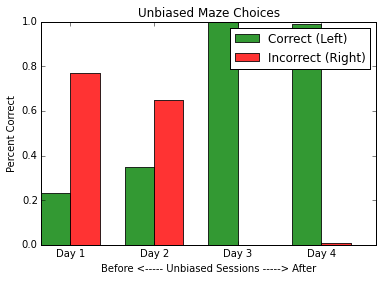

In [46]:
#Plot Unbiased Correct (L correct, R incorrect)
c = [] #correct/left
for j in unbiased_idx:
    correct = list(summary[j].Correct).count(True)
    perc_correct = correct/float(len(summary[j]))
    #print perc_correct
    c.append(perc_correct)


w = [1-x for x in c]
#wrong/right side

labels = ('Day 1', 'Day 2', 'Day 3', 'Day 4')  #Unbiased days
y_pos = np.arange(len(w))

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(y_pos, c, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Correct (Left)')
 
rects2 = plt.bar(y_pos + bar_width, w, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Incorrect (Right)')

plt.legend()
plt.xticks(y_pos+bar_width, labels)
plt.xlabel('Before <----- Unbiased Sessions -----> After')
plt.ylabel('Percent Correct')
plt.title('Unbiased Maze Choices')
plt.show()

plt.savefig(path+'/unbiased150.jpg')

# Plot Animal Performance

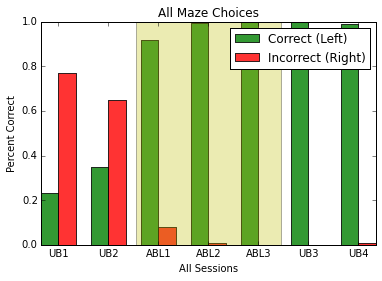

0.290213675214 0.970612013906 0.995


In [47]:
#Plot Correct (L correct, R incorrect)
c = [] #correct/left
for j in range(7):
    
    correct = list(summary[j].Correct).count(True)
    perc_correct = correct/float(len(summary[j]))
    #print perc_correct
    c.append(perc_correct)


w = [1-x for x in c]
#wrong/right side

labels = ['UB1', 'UB2', 'ABL1', 'ABL2', 'ABL3', 'UB3', 'UB4']  #All days
y_pos = np.arange(len(w))

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(y_pos, c, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Correct (Left)')
 
rects2 = plt.bar(y_pos + bar_width, w, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Incorrect (Right)')

plt.legend()
plt.xticks(y_pos+bar_width, labels)
plt.xlabel('All Sessions')
plt.ylabel('Percent Correct')
plt.title('All Maze Choices')
plt.axvspan(1.9,4.8, facecolor = 'y', alpha = 0.3)
plt.show()

plt.savefig(path+'/allsessions150.jpg')

mu_perc_corrUB_before = np.mean(c[0:2])
mu_perc_corrAB = np.mean(c[2:5])
mu_perc_corrUB_after = np.mean(c[5:7])

print mu_perc_corrUB_before, mu_perc_corrAB, mu_perc_corrUB_after

# Time stats

[13.086600000000006, 10.571743589743587, 20.486999999999995, 8.89933834586466, 8.68451376146789, 9.566323943661972, 11.731740000000002]


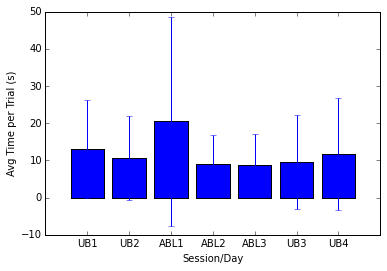

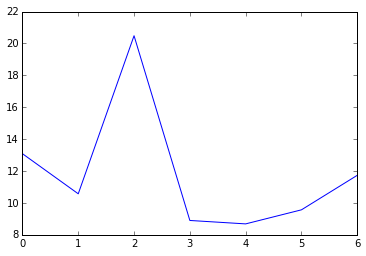

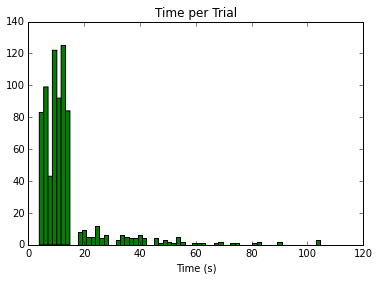

In [48]:
# Mean Time per trial
mu_time = []
std_time = []

[mu_time.append(x.time.mean()) for x in summary]
[std_time.append(x.time.std()) for x in summary]
print mu_time

plt.bar(range(0,len(mu_time)), mu_time, align = "center", yerr = std_time)

labels = ['UB1', 'UB2', 'ABL1', 'ABL2', 'ABL3', 'UB3', 'UB4']
ypos = np.arange(len(mu_time))
plt.xticks(ypos,labels)
plt.xlabel('Session/Day')
plt.ylabel('Avg Time per Trial (s)')

plt.figure(2)
plt.plot(mu_time,'-')

plt.figure(3)
t = []
[t.append(x.time) for x in summary]

plt.hist(t,8, facecolor = 'g')
plt.title('Time per Trial')
plt.xlabel('Time (s)')
            
            

[2.7172, 1.9937264957264955, 8.016483870967743, 3.5217443609022556, 2.443284403669724, 2.0050704225352116, 2.13944]
[3.945077341741633, 2.1927100521561003, 19.170485493516136, 5.9520898769970305, 4.569784957441049, 4.826068841520042, 3.563662683761801]


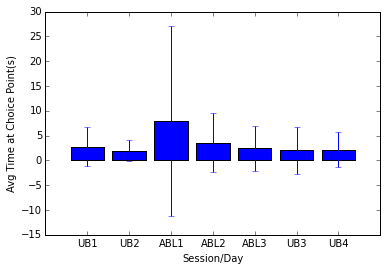

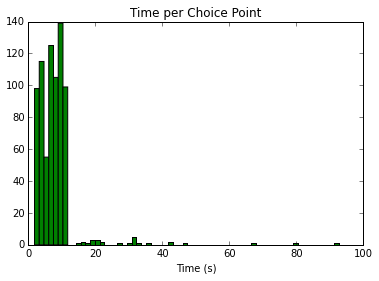

In [49]:
mu_choice = []
std_choice = []

[mu_choice.append(x.timeChoice.mean()) for x in summary]
[std_choice.append(x.timeChoice.std()) for x in summary]
print mu_choice
print std_choice

plt.bar(range(0,len(mu_choice)), mu_choice, align = "center", yerr = std_choice)
labels = ['UB1', 'UB2', 'ABL1', 'ABL2', 'ABL3', 'UB3', 'UB4']
ypos = np.arange(len(mu_time))
plt.xticks(ypos,labels)
plt.xlabel('Session/Day')
plt.ylabel('Avg Time at Choice Point(s)')

plt.figure(2)
choice = []
[choice.append(x.timeChoice) for x in summary]

plt.hist(choice,8, facecolor = 'g')
plt.title('Time per Choice Point')
plt.xlabel('Time (s)')
            
            

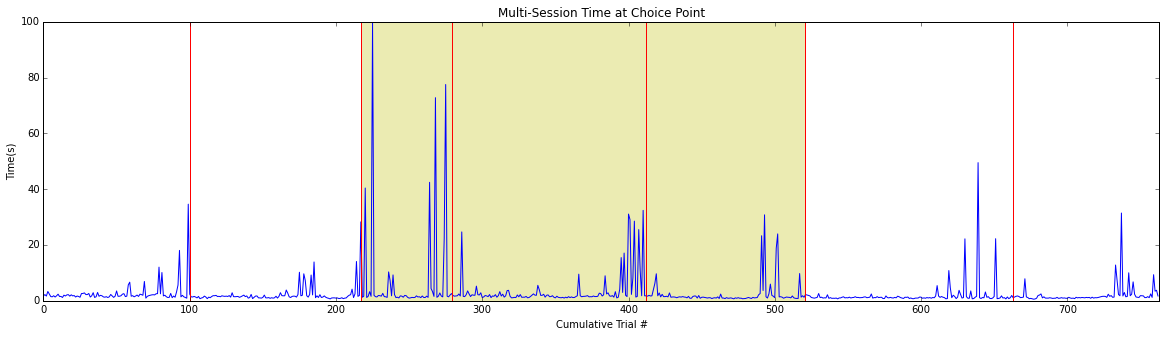

In [50]:
#Plot Choice Time acros all sessions
plt.figure(figsize = [20,5])

tchoice_array = []
len_array = []
for a in range(len(summary)):
    tchoice_array += list(summary[a].timeChoice)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(tchoice_array,'-')
#plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
#plt.yticks([0,1],['Incorrect','Correct'])
plt.title('Multi-Session Time at Choice Point')

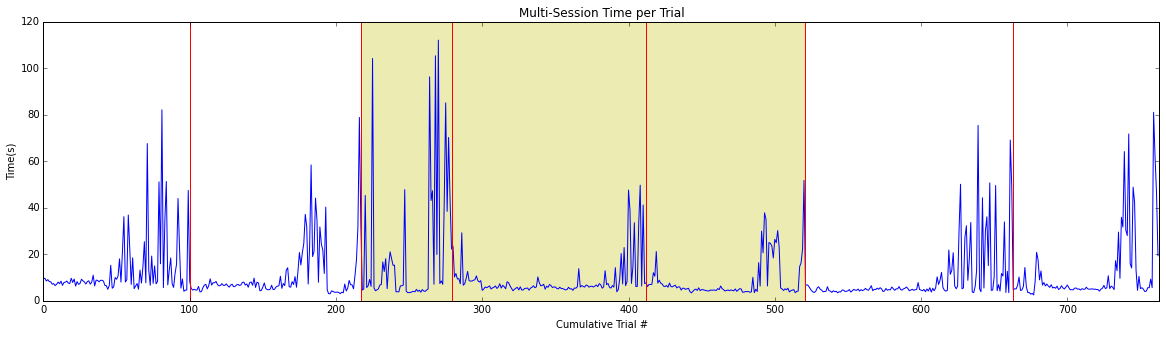

In [51]:
#Plot Trial Time acros all sessions
plt.figure(figsize = [20,5])

time_array = []
len_array = []
for a in range(len(summary)):
    time_array += list(summary[a].time)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(time_array,'-')
#plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
#plt.yticks([0,1],['Incorrect','Correct'])
plt.title('Multi-Session Time per Trial')

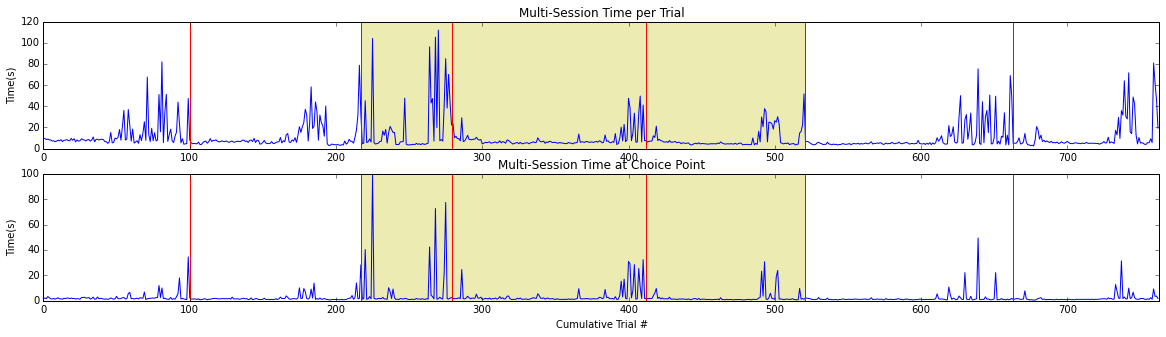

In [52]:
#Subplot
plt.figure(figsize = [20,5])
plt.subplot(211)
plt.plot(time_array,'-')
plt.xlim(0,max(len_array))
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
[plt.axvline(x =a, color='r') for a in len_array]
#plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time per Trial')


plt.subplot(212)
plt.plot(tchoice_array,'-')
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time at Choice Point')


0


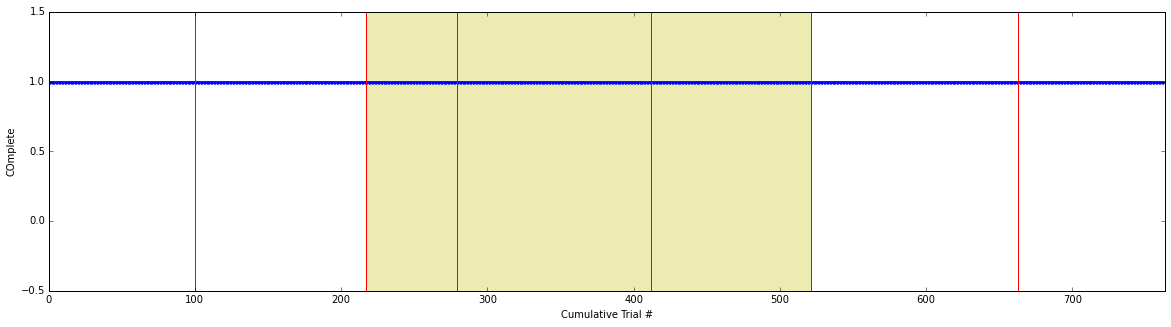

In [53]:
completion  = []
for b in range(len(summary)):
    completion += list(summary[b].Completed)
    
plt.figure(figsize = [20,5])
plt.plot(completion,'.')
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('COmplete')

num_incomplete = completion.count(0)
print num_incomplete

In [54]:
num_deadend = 0
for b in antibias_idx:
    num_deadend += list(summary[b].deadEnd).count(1)

In [55]:
num_deadend

6

In [56]:
#Summary vals for all of an animal's sessions
animal_summary = {'totalDeadEnd': num_deadend, 
                  'incomplete': num_incomplete, 
                  'meanNumTrials' : mean_trials,
                  'meanTime' : np.mean(time_array),
                  'meanChoice': np.nanmean(tchoice_array),
                  'numDays': len(summary),
                  'correctBefore': mu_perc_corrUB_before,
                  'correctAntibias': mu_perc_corrAB,
                  'correctAfter' : mu_perc_corrUB_after,
                  'Animal' :150,}

In [57]:
animal_summary = pd.Series(animal_summary)

In [58]:
animal_summary.to_csv( path + "/animalsummary150.csv")

In [59]:
animal_summary

Animal             150.000000
correctAfter         0.995000
correctAntibias      0.970612
correctBefore        0.290214
incomplete           0.000000
meanChoice           2.929727
meanNumTrials      109.000000
meanTime            11.110831
numDays              7.000000
totalDeadEnd         6.000000
dtype: float64

# Add pro-bias session analysis

In [60]:
logpath = '/Users/MJAY-MAC/Desktop/GITHUB/mVR-meta/mvr_extraswitch_log.xlsx'
extralog = pd.read_excel(logpath)
extralog

extra_sessions = extralog[(extralog.AnimalNum == 150)]
#unbiased = sessions[(sessions.SessionType == 'unbiased')]
antibiasR = extra_sessions[(extra_sessions.SessionType == 'antibiasR')]
sessions = (pd.concat([unbiased,antibiasL,antibiasR])).sort(columns = 'SessionNum')
session_vals= [int(x) for x in sessions.SessionNum]
print sessions

    AnimalNum  SessionNum SessionType
32        150          57    unbiased
33        150          59    unbiased
34        150          66   antibiasL
35        150          70   antibiasL
36        150          74   antibiasL
37        150          78    unbiased
38        150          82    unbiased
4         150          88   antibiasR
5         150          91   antibiasR


In [61]:
summary_extra = [pd.read_csv(path + '/0000' + str(x) + '/summary/trial_summary' + str(x)+ '.csv') for x in session_vals[-2:]]


summary_extra = [mvr.correctR(x) for x in summary_extra]
summary+=summary_extra

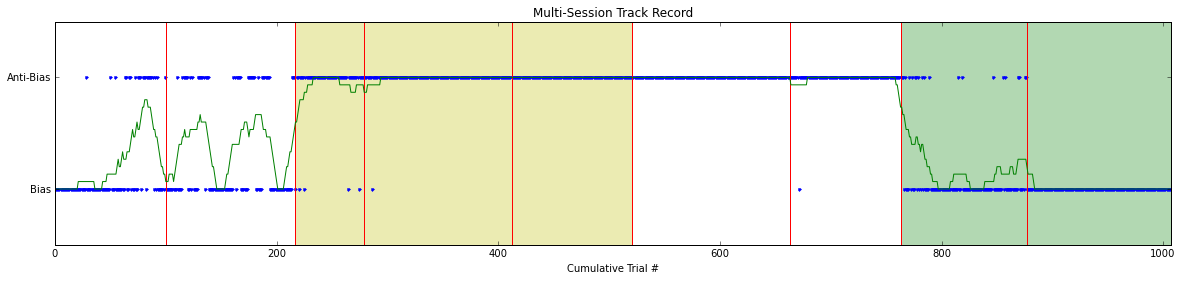

In [62]:
#Plot Correct Track Record acros all sessions (main behavior)
plt.figure(figsize = [20,4])

dot_array = []
len_array = []
for a in range(len(summary)):
    dot_array += list(summary[a].Correct)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(dot_array,'.')
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[6],len_array[8], facecolor = 'g', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.yticks([0,1],['Bias','Anti-Bias'])
plt.title('Multi-Session Track Record')


avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(dot_array,kernel, 'same')
plt.plot(avgs) 

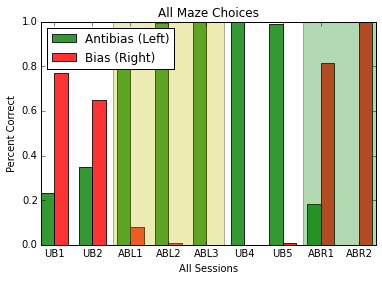

0.290213675214 0.970612013906 0.995


In [65]:
#Plot Unbiased Correct (L correct, R incorrect)
c = [] #correct/left
for j in range(len(summary)):
    
    correct = list(summary[j].Correct).count(True)
    perc_correct = correct/float(len(summary[j]))
    #print perc_correct
    c.append(perc_correct)


w = [1-x for x in c]
#wrong/right side

labels = ['UB1', 'UB2','ABL1', 'ABL2', 'ABL3', 'UB4', 'UB5', 'ABR1', 'ABR2']  #All days
y_pos = np.arange(len(w))

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(y_pos, c, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Antibias (Left)')
 
rects2 = plt.bar(y_pos + bar_width, w, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Bias (Right)')

plt.legend( loc = 'best')
plt.xticks(y_pos+bar_width, labels)
plt.xlabel('All Sessions')
plt.ylabel('Percent Correct')
plt.title('All Maze Choices')
plt.axvspan(1.9,4.8, facecolor = 'y', alpha = 0.3)
plt.axvspan(6.9,8.8, facecolor = 'g', alpha = 0.3)
plt.show()

mu_perc_corrUB_before = np.mean(c[0:2])
mu_perc_corrAB = np.mean(c[2:5])
mu_perc_corrUB_after = np.mean(c[5:7])

print mu_perc_corrUB_before, mu_perc_corrAB, mu_perc_corrUB_after